In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
prev_app = pd.read_csv('previous_application.csv')

In [3]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


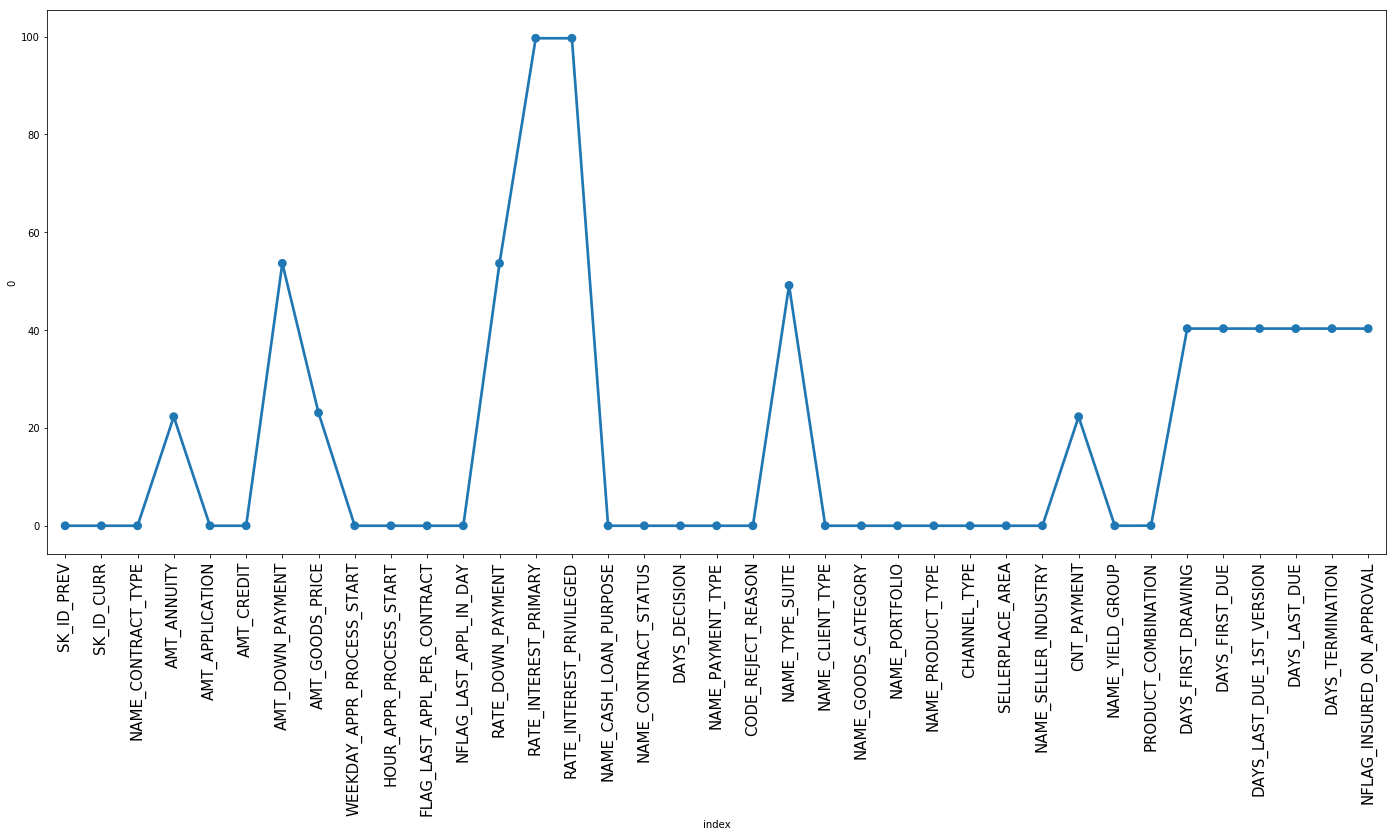

In [7]:
fig = plt.figure(figsize=(24,10))
miss = pd.DataFrame((prev_app.isnull().sum()*100)/prev_app.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data=miss)
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [4]:
prev_app['SK_ID_PREV'].nunique()/prev_app['SK_ID_CURR'].nunique()

4.928964135313716

In [5]:
prev_app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

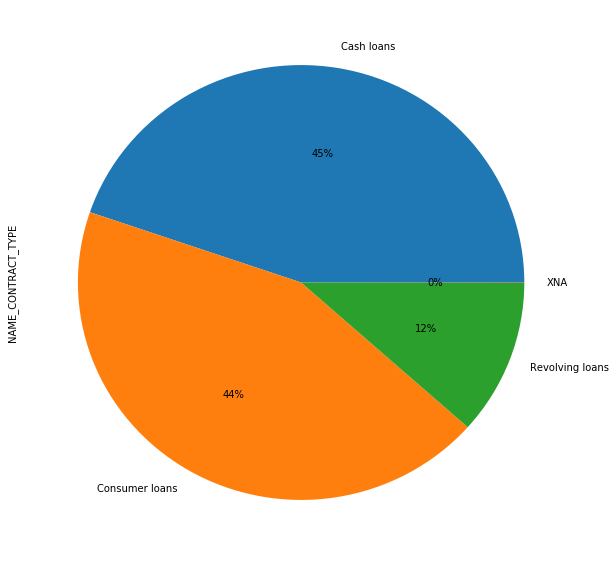

In [6]:
plt.figure(figsize=(10,10))
prev_app['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%1.0f%%');
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


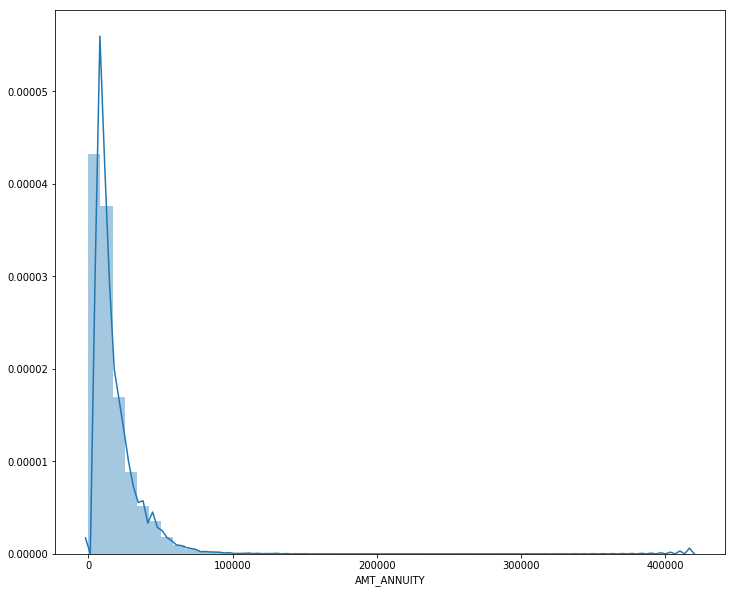

In [7]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['AMT_ANNUITY'].dropna())
plt.show()

The data is negatively skewed again.

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


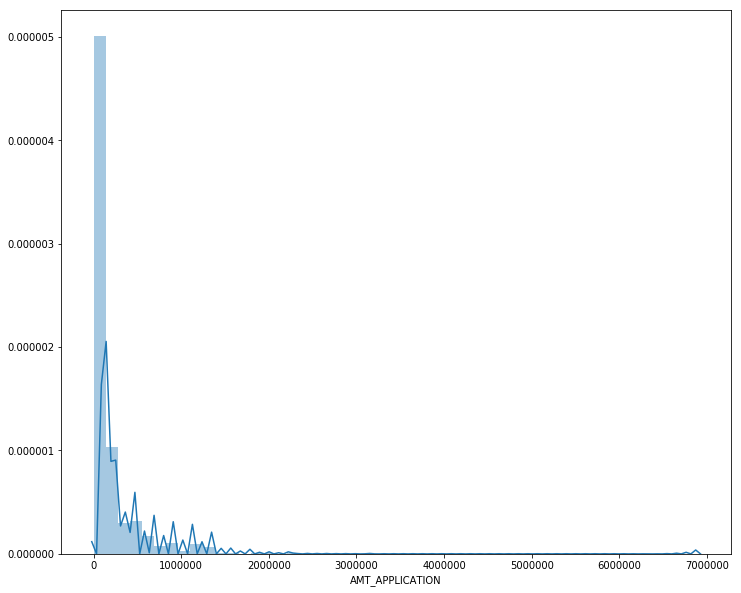

In [8]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['AMT_APPLICATION'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


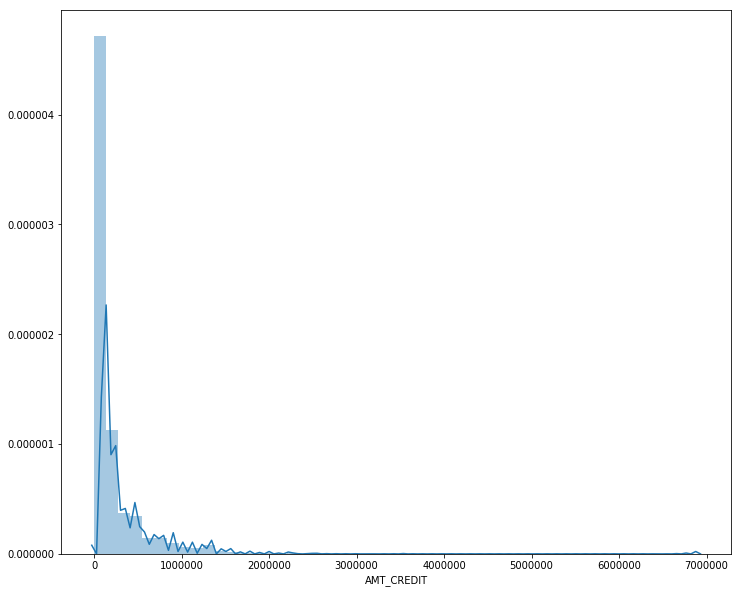

In [9]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['AMT_CREDIT'].dropna())
plt.show()

In [10]:
prev_app['_AMT_APPLICATION_ACTUAL_RATIO'] = prev_app['AMT_CREDIT']/(1+prev_app['AMT_APPLICATION'])

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


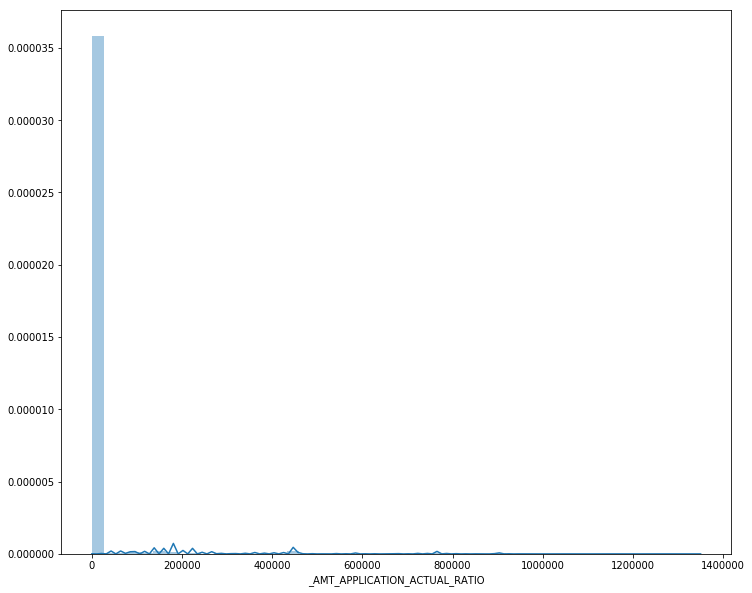

In [11]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['_AMT_APPLICATION_ACTUAL_RATIO'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


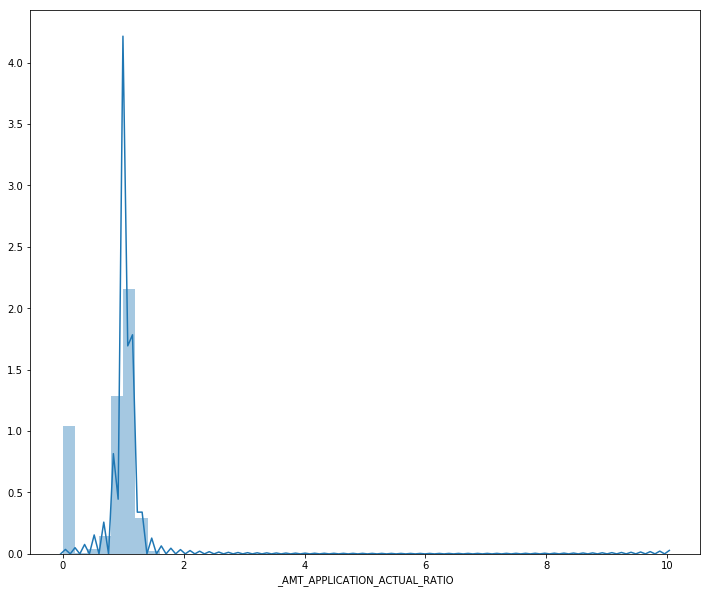

In [12]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app[prev_app['_AMT_APPLICATION_ACTUAL_RATIO']<10]['_AMT_APPLICATION_ACTUAL_RATIO'].dropna())
plt.show()

Peak at one says a lot of peple got the amounnt they asked for

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


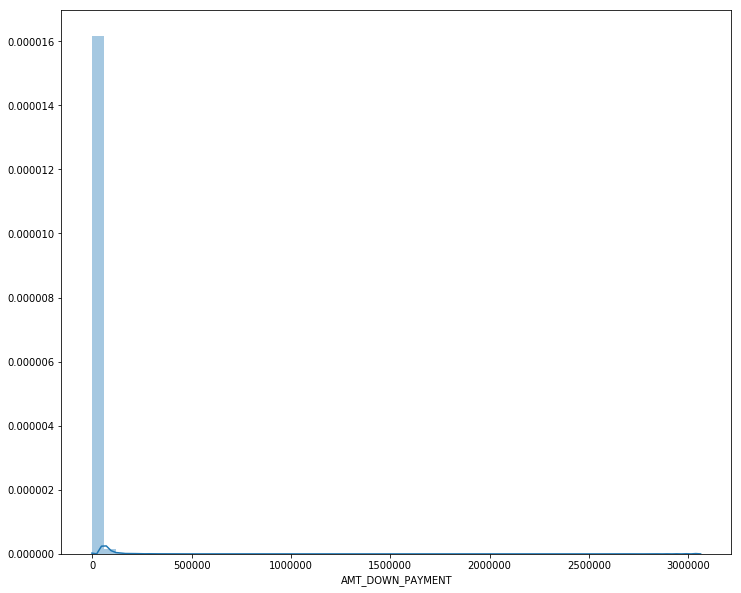

In [13]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['AMT_DOWN_PAYMENT'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


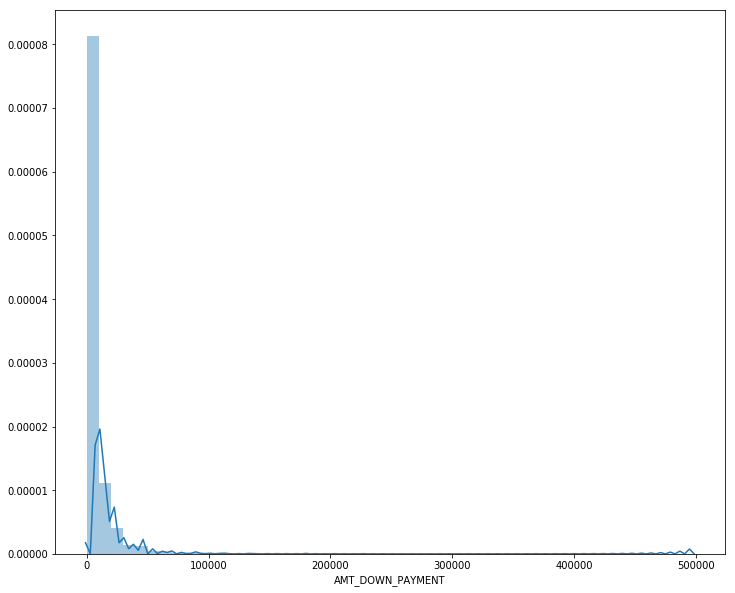

In [14]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app[prev_app['AMT_DOWN_PAYMENT']<5e5]['AMT_DOWN_PAYMENT'].dropna())
plt.show()

In [15]:
prev_app['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [16]:
prev_app['NFLAG_LAST_APPL_IN_DAY'].value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [18]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       '_AMT_APPLICATION_ACTUAL_RATIO'],
      dtype='object')

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


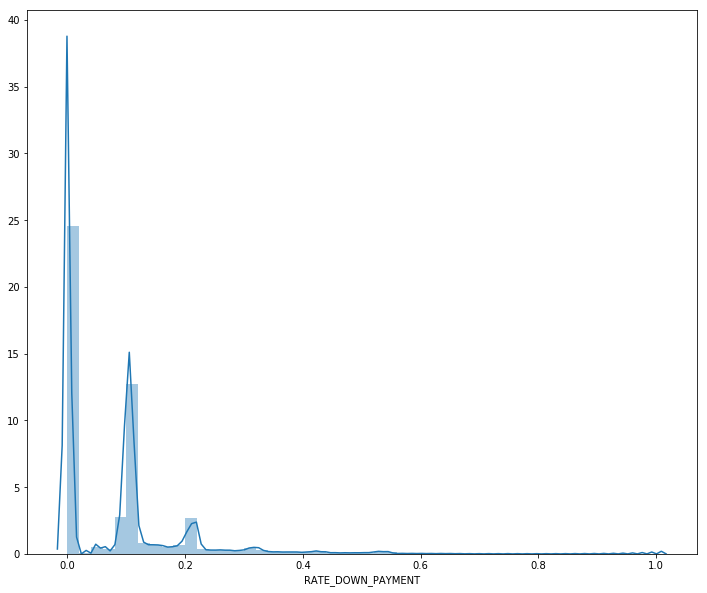

In [19]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['RATE_DOWN_PAYMENT'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


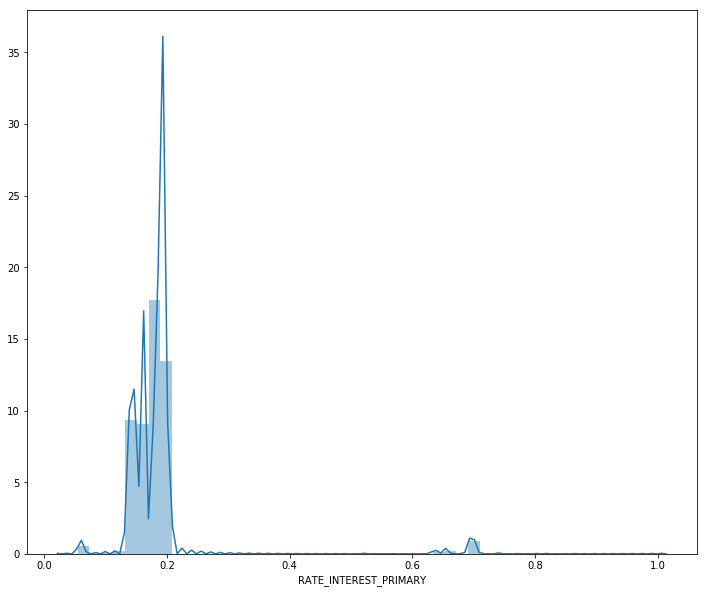

In [20]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['RATE_INTEREST_PRIMARY'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


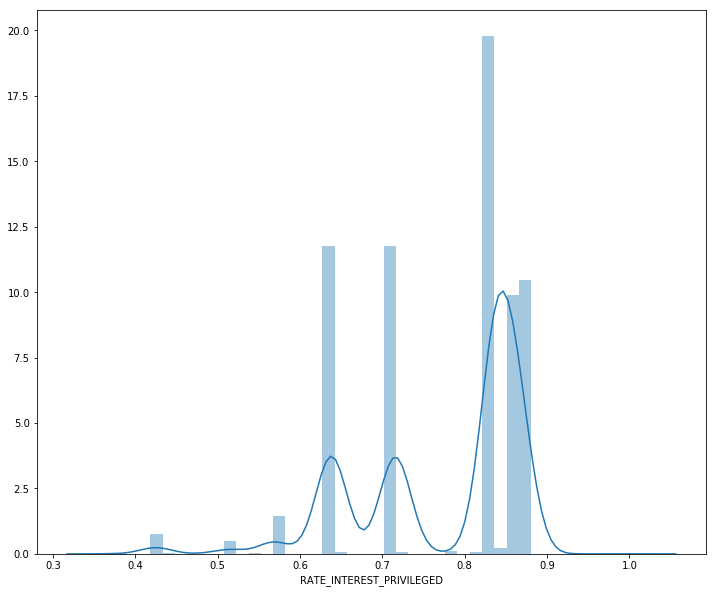

In [22]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['RATE_INTEREST_PRIVILEGED'].dropna())
plt.show()

In [23]:
prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

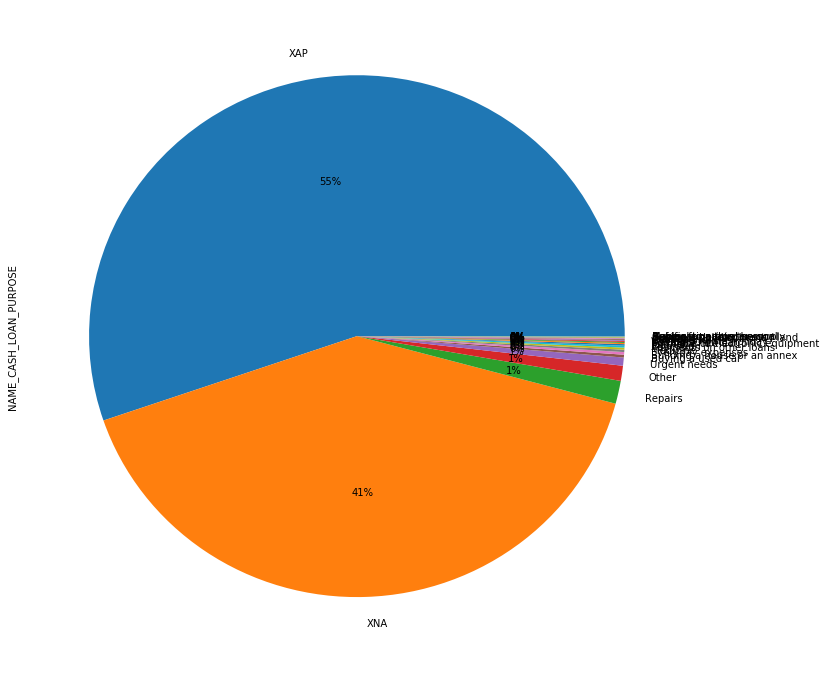

In [24]:
plt.figure(figsize=(12,12))
prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

In [25]:
prev_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

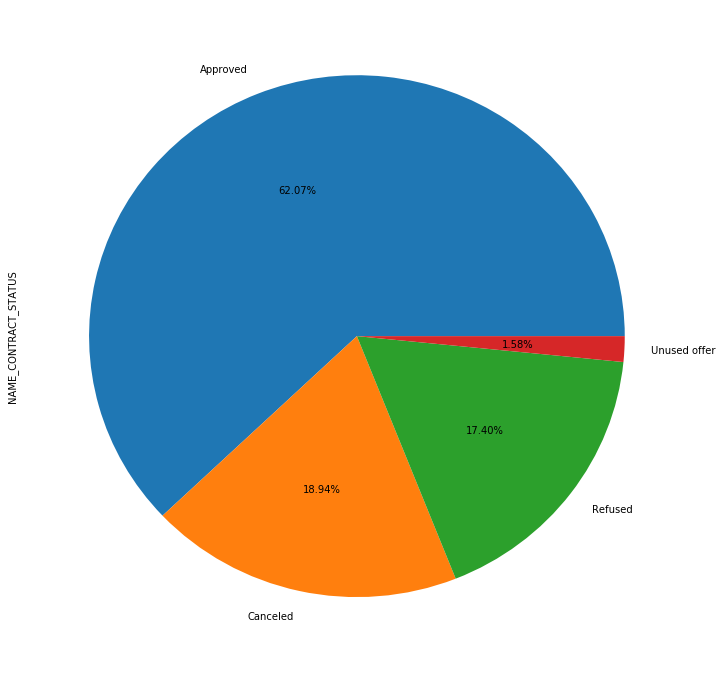

In [28]:
plt.figure(figsize=(12,12))
prev_app['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


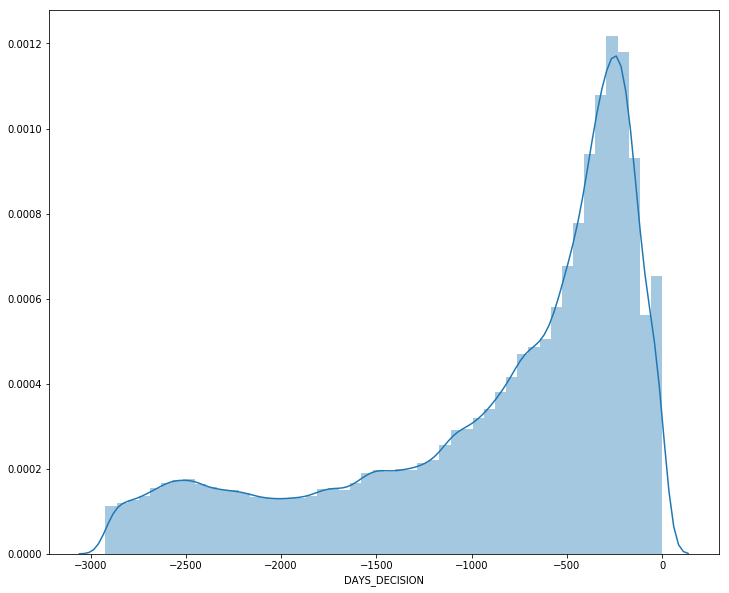

In [29]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['DAYS_DECISION'].dropna())
plt.show()

In [30]:
prev_app['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [31]:
prev_app['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [32]:
prev_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [34]:
prev_app['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [35]:
prev_app['NAME_GOODS_CATEGORY'].value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
House Construction               1
Animals                          1
Name: NAME_GOODS_CAT

We may want to replace the rare categories in the data, because the model will over fit the rare category.

In [36]:
prev_app['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [37]:
prev_app['NAME_PRODUCT_TYPE'].value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

In [38]:
prev_app['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


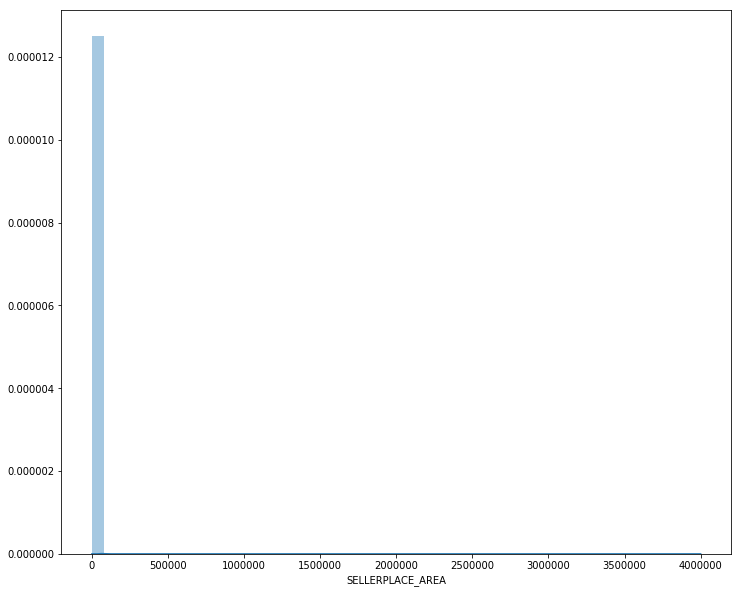

In [41]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['SELLERPLACE_AREA'])
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


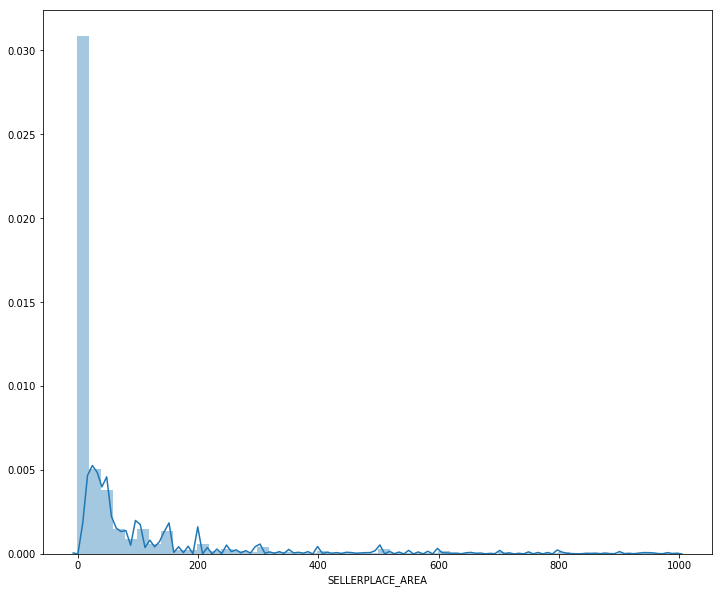

In [43]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app[prev_app['SELLERPLACE_AREA']<1e3]['SELLERPLACE_AREA'])
plt.show()

In [44]:
prev_app['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


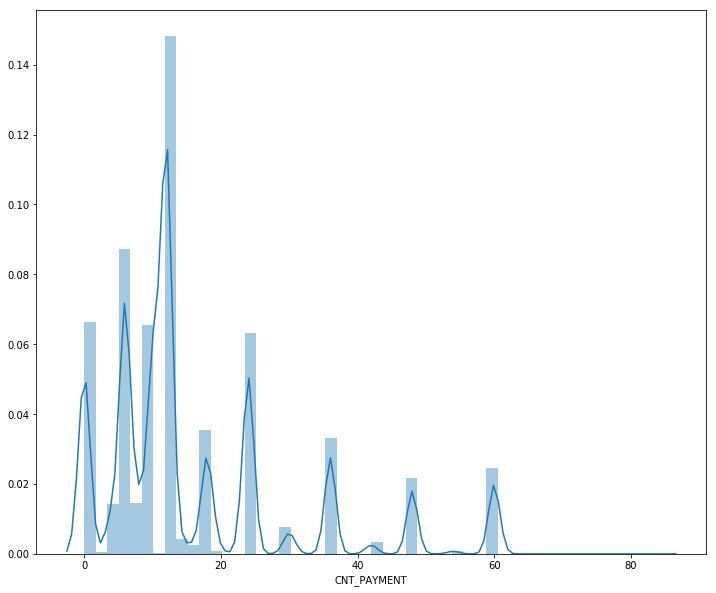

In [46]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['CNT_PAYMENT'].dropna())
plt.show()

In [48]:
prev_app['NAME_YIELD_GROUP'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [49]:
prev_app['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


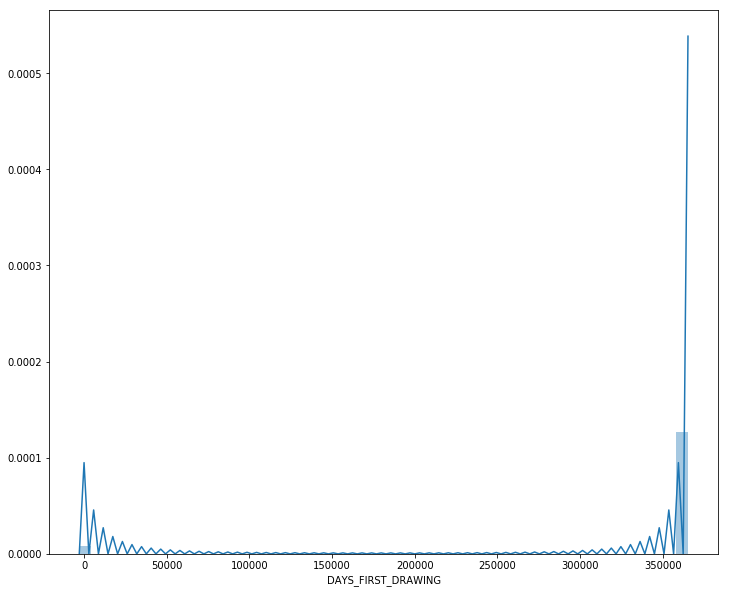

In [51]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['DAYS_FIRST_DRAWING'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


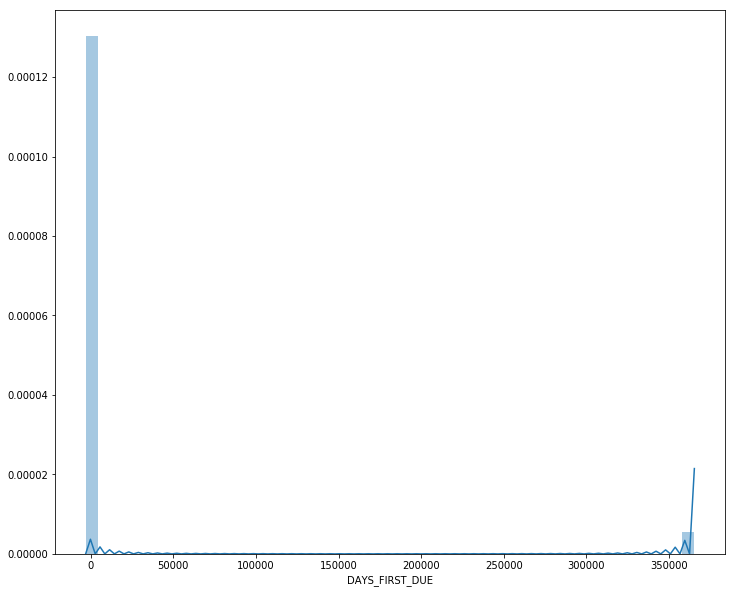

In [53]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['DAYS_FIRST_DUE'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


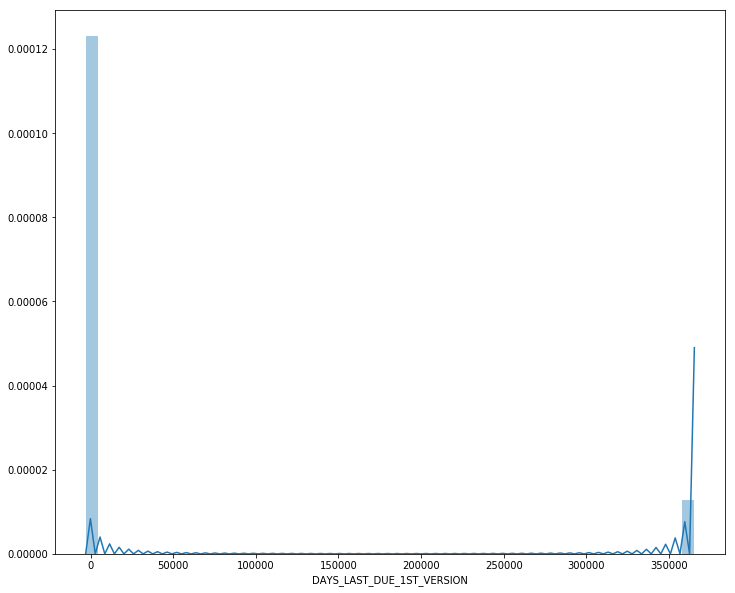

In [54]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['DAYS_LAST_DUE_1ST_VERSION'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


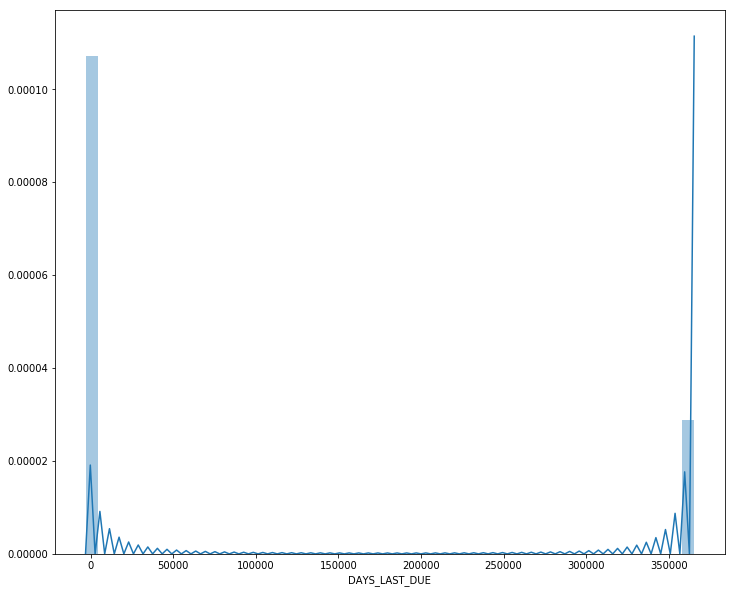

In [55]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['DAYS_LAST_DUE'].dropna())
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


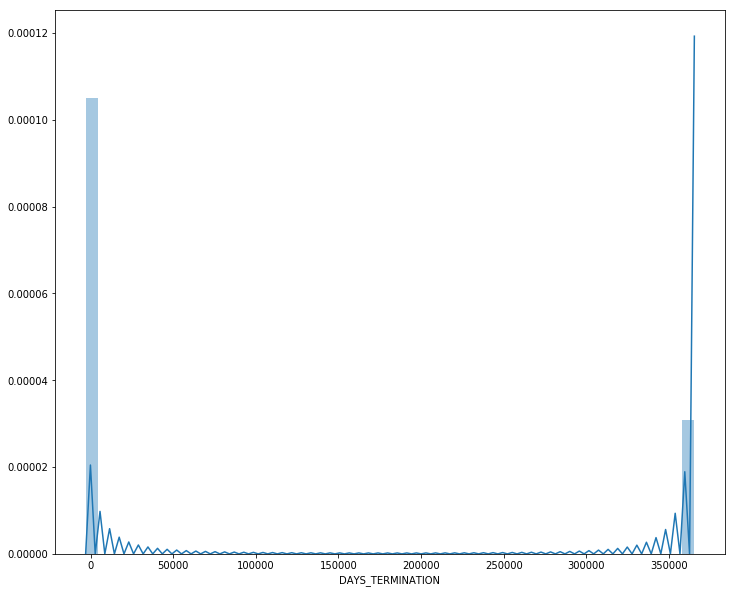

In [56]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app['DAYS_TERMINATION'].dropna())
plt.show()

In [57]:
prev_app['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [4]:
prev_app.head(10).T

,0,1,2,3,4,5,6,7,8,9
SK_ID_PREV,2030495,2802425,2523466,2819243,1784265,1383531,2315218,1656711,2367563,2579447
SK_ID_CURR,271877,108129,122040,176158,202054,199383,175704,296299,342292,334349
NAME_CONTRACT_TYPE,Consumer loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
AMT_ANNUITY,1730.43,25188.6,15060.7,47041.3,31924.4,23703.9,NaN,NaN,NaN,NaN
AMT_APPLICATION,17145,607500,112500,450000,337500,315000,0,0,0,0
AMT_CREDIT,17145,679671,136444,470790,404055,340574,0,0,0,0
AMT_DOWN_PAYMENT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,17145,607500,112500,450000,337500,315000,NaN,NaN,NaN,NaN
WEEKDAY_APPR_PROCESS_START,SATURDAY,THURSDAY,TUESDAY,MONDAY,THURSDAY,SATURDAY,TUESDAY,MONDAY,MONDAY,SATURDAY
HOUR_APPR_PROCESS_START,15,11,11,7,9,8,11,7,15,15


In [5]:
prev_app['AMT_DOWN_PAYMENT'].isnull().sum()

895844

c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


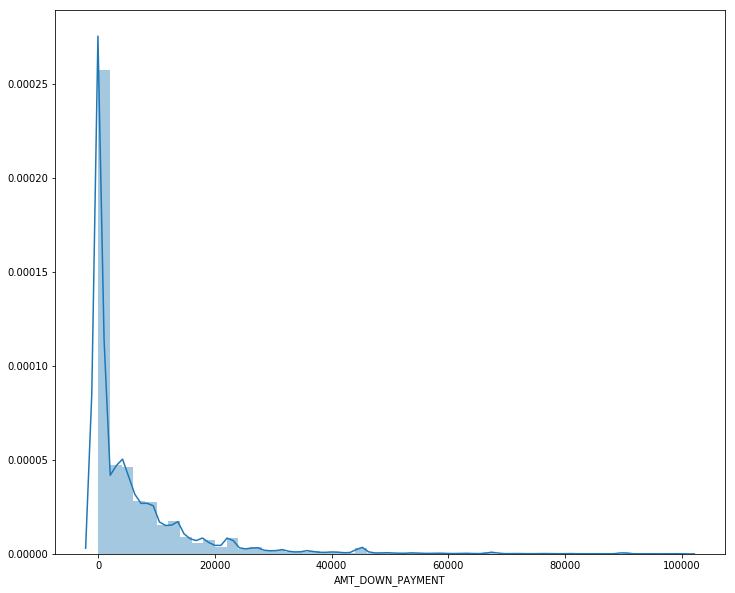

In [8]:
plt.figure(figsize=(12,10))
sns.distplot(prev_app[prev_app['AMT_DOWN_PAYMENT']<100000]['AMT_DOWN_PAYMENT'])
plt.show()

In [9]:
(prev_app['AMT_DOWN_PAYMENT'] == 0).sum()

369854

In [4]:
prev_app = prev_app[['NFLAG_INSURED_ON_APPROVAL', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 
                    'DAYS_FIRST_DRAWING', 'NAME_YIELD_GROUP', 'CODE_REJECT_REASON', 'SK_ID_PREV', 'SK_ID_CURR']]

In [6]:
prev_app.isnull().sum()

NFLAG_INSURED_ON_APPROVAL    673065
DAYS_TERMINATION             673065
DAYS_LAST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_FIRST_DUE               673065
DAYS_FIRST_DRAWING           673065
NAME_YIELD_GROUP                  0
CODE_REJECT_REASON                0
SK_ID_PREV                        0
SK_ID_CURR                        0
dtype: int64

In [5]:
prev_app['LATE_DAYS'] = prev_app['DAYS_LAST_DUE'] - prev_app['DAYS_LAST_DUE_1ST_VERSION']

In [8]:
prev_app.head()

,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,NAME_YIELD_GROUP,CODE_REJECT_REASON,SK_ID_PREV,SK_ID_CURR,LATE_DAYS
0,0.0,-37.0,-42.0,300.0,-42.0,365243.0,middle,XAP,2030495,271877,-342.0
1,1.0,365243.0,365243.0,916.0,-134.0,365243.0,low_action,XAP,2802425,108129,364327.0
2,1.0,365243.0,365243.0,59.0,-271.0,365243.0,high,XAP,2523466,122040,365184.0
3,1.0,-177.0,-182.0,-152.0,-482.0,365243.0,middle,XAP,2819243,176158,-30.0
4,NaN,NaN,NaN,NaN,NaN,NaN,high,HC,1784265,202054,NaN


In [6]:
prev_app['EXTRA_DAYS'] = prev_app['DAYS_LAST_DUE'] - prev_app['DAYS_TERMINATION']

In [7]:
prev_app = pd.concat([prev_app, pd.get_dummies(prev_app['NAME_YIELD_GROUP'])], axis=1).drop('NAME_YIELD_GROUP', axis=1)

In [8]:
prev_app = pd.concat([prev_app, pd.get_dummies(prev_app['CODE_REJECT_REASON'])], axis=1).drop('CODE_REJECT_REASON', axis=1)

In [9]:
for col in prev_app.columns:
    prev_app[col].fillna(prev_app[col].mean(), inplace=True)

In [10]:
prev_app_curr_appl = prev_app.groupby('SK_ID_CURR').mean()

In [11]:
prev_app_curr_appl.head()

,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,SK_ID_PREV,LATE_DAYS,EXTRA_DAYS,XNA,...,middle,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.000000,-1612.000000,-1619.000000,-1499.000000,-1709.000000,365243.0,1.369693e+06,-120.0,-7.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100002,0.000000,-17.000000,-25.000000,125.000000,-565.000000,365243.0,1.038818e+06,-150.0,-8.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100003,0.666667,-1047.333333,-1054.333333,-1004.333333,-1274.333333,365243.0,2.281150e+06,-50.0,-7.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100004,0.000000,-714.000000,-724.000000,-694.000000,-784.000000,365243.0,1.564014e+06,-30.0,-10.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100005,0.000000,-460.000000,-466.000000,-376.000000,-706.000000,365243.0,2.176837e+06,-90.0,-6.0,0.5,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
prev_app_curr_appl.to_csv('previous_application_ready.csv')